# Analysis of our chosen dataset
The purpose of this notebook is to provide some analysis on the dataset that we have chosen to use.

In [1]:
# This is the code used to preprocess our dataset. 
# Each step is explained in detail in the 'Data Pre-processing' notebook.

import numpy as np
import pandas as pd

df = pd.read_csv('news.csv')
df['news'] = df['title'] + ' ' + df['text']
convert_to_binary = {'REAL':1,'FAKE':0}
df['label'] = df['label'].map(convert_to_binary)
df = df.drop([df.columns[0],df.columns[1],df.columns[2]],axis=1)
df = df.reindex(columns=['news','label'])

import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re

stop_words = stopwords.words('english')
stop_words.extend(['the','it','in'])
WNL = WordNetLemmatizer()

for index, row in df.iterrows():
    filtered_article = ''
    article = row['news']
    article = re.sub(r'[^\w\s]', '', article)
    words = [word.lower() for word in nltk.word_tokenize(article)]
    words = [word for word in words if not word in stop_words]
    words_lemmatized = []
    for word in words:
        if word == 'us':
            words_lemmatized.append(word)
        else:
            words_lemmatized.append(WNL.lemmatize(word))
    filtered_article = " ".join([word for word in words_lemmatized])
    df.loc[index, 'news'] = filtered_article
    
df.head()

,news,label
0,smell hillary fear daniel greenfield shillman ...,0
1,watch exact moment paul ryan committed politic...,0
2,kerry go paris gesture sympathy us secretary s...,1
3,bernie supporter twitter erupt anger dnc tried...,0
4,battle new york primary matter primary day new...,1


## Ratio of fake to real

Let's find out how many articles are in our dataset and the number which are fake and real.

In [2]:
print('There are ' + str(len(df)) + ' articles in our dataset.')

There are 6335 articles in our dataset.


In [3]:
print('There are ' + str(len(df[df['label']==1])) + ' real news articles and ' + str(len(df[df['label']==0])) + ' fake news articles in our dataset.')

There are 3171 real news articles and 3164 fake news articles in our dataset.


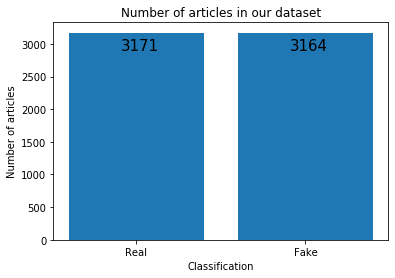

In [5]:
# Visualise this on a bar chart.
import matplotlib.pyplot as plt

x = ['Real','Fake']
y = [len(df[df['label']==1]),len(df[df['label']==0])]
plt.bar(x,y)
plt.title('Number of articles in our dataset')
plt.xlabel('Classification')
plt.ylabel('Number of articles')
plt.text(-0.09,2900,str(len(df[df['label']==1])),fontsize=15)
plt.text(0.91,2900,str(len(df[df['label']==0])),fontsize=15)
plt.show()

So we find that we have a very even dataset, with almost exactly the same number of fake news articles as real.

## Most common words

We now want to find the most common words used in the news articles in our dataset.

In [6]:
# Let's create a dictionary of all words used in any article in our dataset and their corresponding word count.
word_count = {}
for index, row in df.iterrows():
    sentence = row['news']
    words = nltk.word_tokenize(sentence)
    for word in words:
        if word in word_count:
            word_count[word] += 1
        else:
            word_count[word] = 1
word_count 

{'smell': 45,
 'hillary': 7741,
 'fear': 1027,
 'daniel': 109,
 'greenfield': 18,
 'shillman': 5,
 'journalism': 182,
 'fellow': 491,
 'freedom': 1107,
 'center': 1352,
 'new': 9548,
 'york': 2235,
 'writer': 300,
 'focusing': 180,
 'radical': 459,
 'islam': 369,
 'final': 794,
 'stretch': 149,
 'election': 6572,
 'rodham': 125,
 'clinton': 18529,
 'gone': 546,
 'war': 4529,
 'fbi': 2617,
 'word': 1645,
 'unprecedented': 285,
 'thrown': 135,
 'around': 2403,
 'often': 1269,
 'ought': 156,
 'retired': 415,
 'still': 3437,
 'nominee': 2063,
 'major': 1573,
 'political': 5234,
 'party': 6521,
 'go': 3663,
 'thats': 3131,
 'exactly': 637,
 'people': 11897,
 'done': 1410,
 'coma': 11,
 'patient': 308,
 'waking': 82,
 'watching': 329,
 'hour': 1240,
 'cnn': 1351,
 'hospital': 368,
 'bed': 107,
 'would': 12711,
 'assume': 184,
 'director': 1396,
 'james': 691,
 'comey': 911,
 'opponent': 684,
 'attack': 3509,
 'everyone': 991,
 'obama': 6854,
 'circulated': 46,
 'letter': 813,
 'attacking': 2

In [7]:
word_count_df = pd.DataFrame(word_count.items(), columns = ['word','count'])
word_count_df = word_count_df.sort_values(by='count',ascending=False).reset_index().drop('index',axis=1)
word_count_df.head(20)

,word,count
0,trump,23138
1,said,21193
2,clinton,18529
3,state,15148
4,us,13198
5,would,12711
6,one,11952
7,people,11897
8,republican,9651
9,new,9548


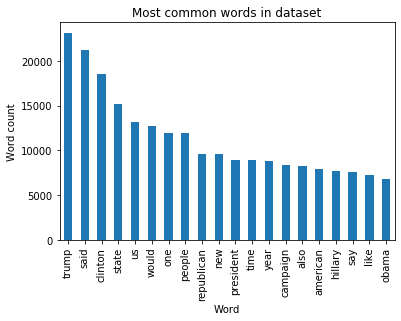

In [12]:
# We can plot this on a bar chart.
import matplotlib.pyplot as plt
bar_graph = word_count_df.head(20).plot.bar(x='word',legend=None)
plt.title('Most common words in dataset')
plt.ylabel('Word count')
plt.xlabel('Word')
plt.savefig('common_words.png', bbox_inches='tight')

In [13]:
# Now lets see if there is any difference between the most common words in the articles labelled as real vs fake.

# Creating a word count for fake news articles.
word_count_fake = {}
for index, row in df.iterrows():
    if row['label'] == 0:
        sentence = row['news']
        words = nltk.word_tokenize(sentence)
        for word in words:
            if word in word_count_fake:
                word_count_fake[word] += 1
            else:
                word_count_fake[word] = 1
                
# Creating a word count for real news articles.
word_count_real = {}
for index, row in df.iterrows():
    if row['label'] == 1:
        sentence = row['news']
        words = nltk.word_tokenize(sentence)
        for word in words:
            if word in word_count_real:
                word_count_real[word] += 1
            else:
                word_count_real[word] = 1

In [14]:
word_count_fake_df = pd.DataFrame(word_count_fake.items(), columns = ['word','count'])
word_count_fake_df = word_count_fake_df.sort_values(by='count',ascending=False).reset_index().drop('index',axis=1)

word_count_real_df = pd.DataFrame(word_count_real.items(), columns = ['word','count'])
word_count_real_df = word_count_real_df.sort_values(by='count',ascending=False).reset_index().drop('index',axis=1)

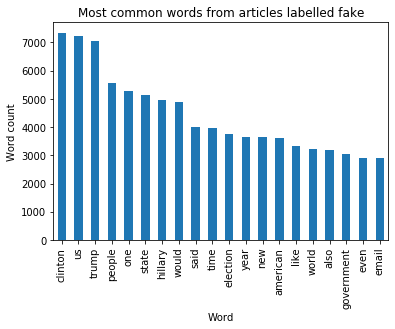

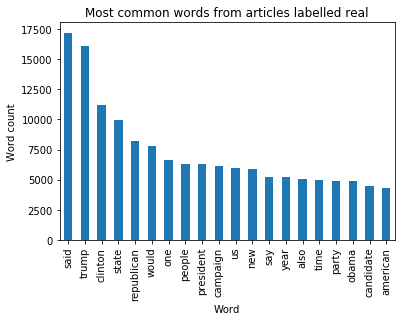

In [15]:
bar_graph_fake = word_count_fake_df.head(20).plot.bar(x='word',legend=None)
plt.title('Most common words from articles labelled fake')
plt.ylabel('Word count')
plt.xlabel('Word')
plt.show()

bar_graph_real = word_count_real_df.head(20).plot.bar(x='word',legend=None)
plt.title('Most common words from articles labelled real')
plt.ylabel('Word count')
plt.xlabel('Word')
plt.show()

We find that there are several words, such as "Trump" and "Clinton", which are very common in both the fake and real articles. This is as expected, since the majority of the news articles in our dataset are from around the 2016 U.S. election. This isn't great; we would prefer a more varied dataset to reduce any bias in our findings.

However, some words do have a larger variance between fake and real articles. For example, the word "said" is clearly used a lot more in the real articles. This is most likely due to the authenticity of the real articles, where quotes are used as evidence, compared to fake news articles where opinions are commonly stated as truth.

Furthermore, it seems that perhaps more sophisticated language is used in the real articles, as longer more official wors such as "republican" and "president" are used more often.

Another thing one notices is that the word count for some of the most common words is much higher for the real news articles than fake. This may be because the real news articles are generally longer and is something we will investigate below.

## Analysis on length of articles

We are now going to analyse the length of our articles. We are focusing on the length of the articles after the stopwords and punctuation have been removed, as this is what we will run our models on.

In [16]:
article_lengths = []
for article in df['news']:
    article_length = len(nltk.word_tokenize(article))
    article_lengths.append(article_length)

Minimum article length: 3
Maximum article length: 10503
Mean article length: 447.19558011049725
Median article length: 352.0


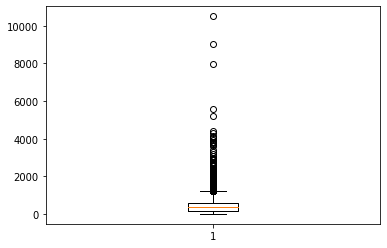

In [17]:
print('Minimum article length: ' + str(min(article_lengths)))
print('Maximum article length: ' + str(max(article_lengths)))
print('Mean article length: ' + str(np.mean(article_lengths)))
print('Median article length: ' + str(np.median(article_lengths)))
plt.boxplot(article_lengths)
plt.show()

As we can see there are numerous outliers in our dataset. The shortest article is "World War 3?" at only 3 words and there are several articles which are much longer than the rest.

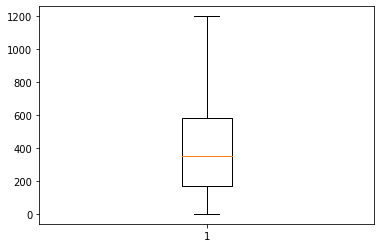

In [18]:
# Boxplot with outliers removed.
plt.boxplot(article_lengths, showfliers=False)
plt.show()

In [19]:
# Now let's compare between real and fake news articles.
df1 = df
df1['length'] = article_lengths
fake = df1[df1['label']==0]
real = df1[df1['label']==1]
fake_article_lengths = fake['length']
real_article_lengths = real['length']

               Minimum  Maximum        Mean  Median
Real articles        3    10503  389.611252   248.0
Fake articles        7     4122  504.652791   443.0
Total                3    10503  447.195580   352.0


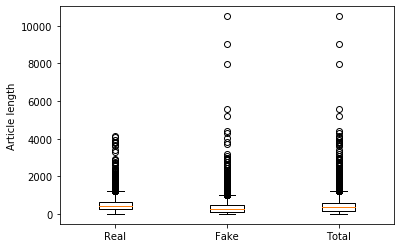

In [20]:
real_values = [min(fake_article_lengths), max(fake_article_lengths), np.mean(fake_article_lengths), np.median(fake_article_lengths)]
fake_values = [min(real_article_lengths), max(real_article_lengths), np.mean(real_article_lengths), np.median(real_article_lengths)]
total_values = [min(article_lengths), max(article_lengths), np.mean(article_lengths), np.median(article_lengths)]
article_lengths_df = pd.DataFrame([real_values,fake_values,total_values], columns=['Minimum','Maximum','Mean','Median'], index=['Real articles','Fake articles','Total'])
print(article_lengths_df)

plt.boxplot([real_article_lengths,fake_article_lengths,article_lengths],labels=['Real','Fake','Total'])
plt.ylabel('Article length')
plt.show()

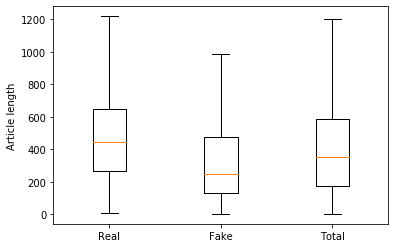

In [21]:
# Again let's remove the outliers from the boxplots.
plt.boxplot([real_article_lengths,fake_article_lengths,article_lengths],labels=['Real','Fake','Total'], showfliers=False)
plt.ylabel('Article length')
plt.show()

We can see that on average, the real articles are longer than the fake articles.